<img src="https://s3.amazonaws.com/datascienceheroes.com/EDV/360_banner_python.png" width="400px">

# Escuela de Datos Vivos
## LAB P.F.4.1: Modelo de clasificación
Creado por Pablo Casas | https://escueladedatosvivos.ai    

## Ejercicios

Crear un clasificador de SPAM, basadose en una tabla pre-procesada. 

1) Separar TR/TS. 

2) Crear un random forest, u otro modelo, ¿se animan? 

3) Calcular curva ROC

4) Al revés del lab, calcular la matriz de confusión con punto de corte de 0.5, y con el punto que devuelva `discrimination_threshold`

5) Comparar ambas matrices de confusión, cual tiene mejor tasa de True Positives?



## Solución

In [25]:
# Librerías que vamos a utilizar

import pandas as pd
import matplotlib.pyplot as plt
from funpymodeling import status
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve

1) Carga de datos

In [14]:
data = pd.read_csv('../data/spam_data.csv')

print(f"Cantidad de registros: {data.shape[0]}")
print(f"Cantidad de variables: {data.shape[1]}")

Cantidad de registros: 4600
Cantidad de variables: 59


Inspeccionamos los datos elegiendo una muestra al azar

In [15]:
data.sample(5)

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
1954,1954,0.42,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.000,0.000,0.000,0.151,0.0,0.0,1.533,9,69,0
2326,2326,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.000,0.664,0.000,0.000,0.0,0.0,3.157,11,60,0
97,97,0.00,0.0,0.0,0.0,0.00,0.6,0.00,0.0,0.0,...,0.207,0.518,0.414,0.310,0.0,0.0,4.897,17,191,1
2843,2843,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.000,0.227,0.227,0.000,0.0,0.0,4.043,28,186,0
1441,1441,0.00,0.0,0.0,0.0,0.97,0.0,0.97,0.0,0.0,...,0.000,0.000,0.000,0.834,0.0,0.0,3.052,68,116,1


Vemos que la columna "Unnamed: 0" no da información, pues es el índice del dato. Eliminamos ese atributo

In [16]:
data = data.drop("Unnamed: 0", axis=1)

Revisamos el estado de los datos

In [18]:
status(data).sort_values(by=["type", "unique"], ascending=False)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
56,capital_run_length_total,0,0.0,0,0.000000,919,int64
55,capital_run_length_longest,0,0.0,0,0.000000,271,int64
57,is_spam,0,0.0,2788,0.606087,2,int64
54,capital_run_length_average,0,0.0,0,0.000000,2160,float64
51,char_freq_!,0,0.0,2343,0.509348,963,float64
49,char_freq_(,0,0.0,1885,0.409783,641,float64
18,word_freq_you,0,0.0,1374,0.298696,575,float64
52,char_freq_$,0,0.0,3200,0.695652,504,float64
20,word_freq_your,0,0.0,2178,0.473478,401,float64
24,word_freq_hp,0,0.0,3510,0.763043,395,float64


Se verifica que los datos han sido pre-procesados adecuadamente.

Separación entre datos de TR y TS

Todas las variables son numéricas, por lo que podemos usar el método de clasificación RandomForest sin hacer one-code enconding.

In [20]:
x_data = data.drop('is_spam', axis=1)
y_data = data['is_spam']

x_tr, x_ts, y_tr, y_ts = train_test_split(x_data, y_data, test_size=0.3, random_state=100)

2) Creación de un modelo predictivo random forest

In [108]:
rf = RandomForestClassifier(     
    n_estimators=19,
    max_depth=6, 
    min_samples_leaf=40,
    random_state=99)

Entrenamos al modelo

In [109]:
rf.fit(x_tr, y_tr)

RandomForestClassifier(max_depth=6, min_samples_leaf=40, n_estimators=19,
                       random_state=99)

3) Graficamos la curva ROC

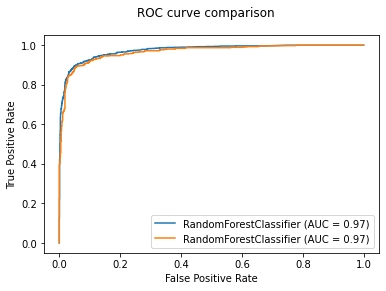

In [133]:
tr_disp = plot_roc_curve(rf, x_tr, y_tr)
ts_disp = plot_roc_curve(rf, x_ts, y_ts, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")
plt.show()

Podemos ver que hay un buen acuerdo entre el rendimiento con los datos de TR y los datos de TS. Además el modelo predice bien.